# Snapchat Political Ads II: Model Design, Prediction Modeling.

### Introduction
This project focuses in creating a regression model to predict the number of Impressions (views) that an ad obtained based on different features. Both models are constructed using Linear Regression and the evaluation metrics chosen are R^2 and RMSE. The dataset, ads, was cleaned using the method indicated at the bottom of this report (project03).

### Baseline Model
In order to begin constructing the baseline model, the categorical variables in our dateset were explored first. It was found that most of these variables contained values that were unique among ads and would most likely not add any information to our model, such variables  were deemed as irrelevant, therefore, the final selected categorical features were: 'Regions (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)', 'Postal Codes (Excluded)', 'Location Categories (Excluded)', 'AgeBracket', 'Gender', 'AdvancedDemographics', 'Language', 'Electoral Districts(Excluded). Intuition behind choosing these features was the following: 'Regions (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)', 'Postal Codes (Excluded)', 'Location Categories (Excluded)', if ad specificed a lot of excluded regions, these ads would most likely have lesser views, for 'AgeBracket', 'Gender', 'AdvancedDemographics', 'Language', these features would describe general features about the population that may lead to higher views, for instance Age targeted for an ad might have more views when targeted to younger audiences as well as AdvancedDemographics, etc. It is important to note that these features contain nominal data types and will be OneHotEncoded. Following this, numerical variables were explored. While exploring numerical variables, it was found that 'Year' was an ordinal variable. As explored in the EDA (project03), ads from 2019 tend to have more views, therefore this was a selected ordinal feature. Continuing exploring quantitative variables, the selected quantitative feature was 'Spend', ads with higher spending will tend to have more views. After selecting all our parameters, the baseline model is created: Transformer 1 holds a  SimpleImputer and an OHE for nominal features: 'Regions (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)', 'Postal Codes (Excluded)', 'Location Categories (Excluded)', 'AgeBracket', 'Gender', 'AdvancedDemographics', 'Language', 'Electoral Districts(Excluded)'. Transformer 2 will hold a SimpleImputer as well (with fill_value of 0) and an OrdinalEncoder for 'Year'. The final transformer is a SimpleImputer for the quantitaive feature, 'Spend'. Putting all transformers together into a ColumnTransformer and into a final Pipeline (containing a LinearRegression model) finalizes the baseline model. In order to get the baseline evaluation metrics, an X_train/test and y_train/test split (using a size of 0.25) was created, this indidividual test outputs a R^2 value of 0.2433 and and RMSE of 98253.909. However, in order to test the range of evaluation metrics that our baseline model generates, a loop is created using the same process: creating 40 model builts in each a X_train/test and y_train/test split (using a size of 0.25) was created and R^2 and RMSE values were obtained. Plotting these R^2 values we see that the baseline model is extremely unstable, most of the R^2 values that the baseline model generated were negative, meaning that our predictions had a higher variance than the actual dataset. This leads to the conclusion that this model is not good and has a lot to improve on. The set of features selected may encalpuse a trend in Impression, however the way that these are engineered in our baseline model does not allow for these features to reflect the trend that we are trying to look for. For instance, one-hot enconding which regions were excluded in the ad does not reflect the intuitive relationship that as the higher number of regions that were excluded increases the less Impressions that an ad may have.

### Final Model
For my final model, I decided to add features based on StartDate and EndDate. These were the only columns added from the baseline model, however the feature engineering to construct and extract important information from original columns was vital in improving both the R^2 and RMSE in the final model. First, in order to extract information from StartDate and EndDate, an engineered feature that will hold the Duration of and ad was created, this feature was added through the following claim: The higher an ad was put up, 
the higher the number of Impressions it got. It is important to note that this feature holds the number of days that an ad was put up, this is in order to allow sklearn to use this feature since pd.datetime is not handled well. This was added to a Pipeline holding our first engineered feature: Getting Duration and Imputing missing values (since EndDate has missing values with 0). Reasoning behind imputing with 0 is that EndDate was found to be NMAR, therefore, we cannot determine a better interpretation of the Duration of such ad. Continuing, it was found in the EDA (project03) that there are trends across the StartDate's weekday and StartDate's month associated with the number of views: higher views at the beginning of the week, higher at the end of the year months as well. In order to extract this information, we create 2 engineered features that will output the StartDay (weekday) and StartMonth that an ad was put up, these values are passed through and OHE with an added PCA to avoid multilinearity. Next, we create a feature that will encapsule the original claim that: as more regions are excluded from the ad, the lesser views it got. In order to do this, we create a new helper function that sums non-null values aross rows within colmuns: 'Regions (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)', 'Postal Codes (Excluded)', 'Location Categories (Excluded)', and  'Electoral Districts(Excluded)'. If an NaN value is present, these are counted as 0, if it was non-null, it is counted as 1. This helper function allowed to sum how many exclusions were made in an ad and was passed down in a Transfomer Pipeline to create the feature. Next, the nominal columns ('AgeBracket', 'Gender', 'AdvancedDemographics', 'Language') were created as a feature by using a OHE and a PCA to avoid multilinearity, which was not done in baseline model. Next, 'Year' was passsed through an OrdinalEncoder after going through a SimpleImputer with a fill_value of 0. Lastly, 'Spend' was just passed through as is, however, the SipleImputer was used to impute with the mean across 'Spend'. All features were passed down through a column transformer, which was used in the creation of a Pipeline using a LinearRegression model. Similarly to the baseline model, we first began to evaluate the final model by doing a X_train/test and y_train/test spit with a split of 0.25. For this single split, we get an R^2 of 0.765, which is way above the range of R^2 values we saw in the baseline model. For the RMSE, we get 10851.27, which is also significantly lower than our baseline model. In order to see the distribution across R^2 and RMSE values using our final model, we create 40 final model builts, which outputs a distribution of R^2 values in the range (~0.0 and ~0.70) and an RMSE distrubition across a range of (0 and ~250,000). To conclude, this model reflects a significantly improved performance compared to the baseline model across both the R^2 values (evaluation metric) and RMSE values. Even though we see some negative R^2 values (around ~-0.2) in our final model, the baseline model ranged across ONLY negative R^2 values of 1e14 in magnitude, which implies that our final model is way more stable than the baseline model and it is able to capture the claimed relationships across chosen columns and the number of views an ad got more sucessfully.  In order to test for the best model for our final model, we perform a similar test using all the same engineered features through a Pipeline holding a DecisionTreeTransformer: building 40 DecisionTreeModels and comparing its R^2 and RMSE values with our final model. This test reflects that choosing this type of regressor makes our model unstable and outputs a range of R^2 values of ~0.0 and ~0.5 with a cluster around ~-2.5, which is significantly lower than when using a LinearRegression model. For RMSE, the DecisionTreeRegressor also reflects RMSE values in between ~50,000 and ~100,000 while our final model got RMSE values < ~25,000. Therefore, we can conclude that our final model using a Linear Regressor reflects a better performance compared to our baseline model across both evaluation metrics, R^2 and RMSE.


### Fairness Evaluation
The subgroup of interest for this test was ads that were distributed outside the US and how predictions for ads in such group differed from ads distributed in the US. In order to perform a fairness evaluation across both groups, a permuation test of 300 trials was performed. This test follows a Null Hypothesis of: final model is fair, performance of model is the same across both groups. This is tested against an Alternative Hypothesis of: final model is unfair; performance of model is higher for US ads. This test uses a significance level alpha of 0.01, and a test statistic of the difference in RMSE between ads distributed outside the US and ads distributed in the US, more specifically RMSE(outside US) - RMSE (US). We began this test by getting the observed test statistic by first calulcating the RMSE of ads with a CountryCode, which represents where an ad was distributed to, that are not equal to the US, and then calculating RMSE for ads that had a CountryCode of "united states". Taking the RMSE(other) - RMSE(US), we get an observed stat of 12831.9. Now, we begin the permutation test using a copy of the dataframe of ads, countries, such that we do not manipute our original data. In each iteration of permutaion test, CountryCode column is shuffled and RMSE(other) and RMSE(US) are both calculated to generate the test statistic. At the end of permutations, we are able to plot our results and observe that the observed stat of 12831.9 outputs a pval of 0.217. Since p-val (0.217) is greater than alpha(0.01), we cannot reject the null and can conclude that our final model is fair across ads in subgroup of interest and ads outside of this group. In other words, there the positive difference that we see from RMSE(other) and RMSE(US) in ads does not seem to be significant, and therefore our model generates predictions that are fair across both of these groups.

# Basic Code: Data Cleaning

Code from project05.py (look at file for more data cleaning details.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import project as proj

In [6]:
# Importing data and Cleaning it!

# We are going to export both data sets and using a funtion from project05.py file (clean_data).
ads18_fp = os.path.join('data', 'PoliticalAds2018.csv')
ads19_fp = os.path.join('data', 'PoliticalAds2019.csv')
ads18 = pd.read_csv(ads18_fp)
ads19 = pd.read_csv(ads19_fp)

ads = proj.clean_data(ads18, ads19) # (description of what this function does exactly on py file is on the bottom of the notebook)
ads.head()

Year                                               ADID  \
0  2018  21d8fa5100ed265ae2b3b6a4642542f375a6efe9936ed5...   
1  2018  2471436eff38d4c282868b26b0b99134314e1fe15d03c4...   
2  2018  f9b26f36da41df36d647af54a1e86b3419ef79b0d65df5...   
3  2018  1e776b512b0148631ffeccceb034322e91cf101d15ee46...   
4  2018  57e32f1e9b3b92f69d7c4f62e1a1ee675fdca080b18ad3...   

                                         CreativeUrl Currency Code  Spend  \
0  https://www.snap.com/political-ads/asset/6253f...           USD    345   
1  https://www.snap.com/political-ads/asset/8660e...           EUR     26   
2  https://www.snap.com/political-ads/asset/108fe...           USD    120   
3  https://www.snap.com/political-ads/asset/5fe04...           USD    907   
4  https://www.snap.com/political-ads/asset/c8d85...           USD    996   

   Impressions                 StartDate                   EndDate  \
0        87750 2018-10-26 18:05:50+00:00 2018-11-06 22:00:00+00:00   
1        12341 2018-11-27 05:00:44+00:00 2019-01-13 11:31:15+00:00   
2        32390 2018-09-25 07:00:00+00:00 2018-09-26 07:00:00+00:00   
3       296577 2018-10-01 21:08:10+00:00                       NaT   
4       105047 2018-10-17 15:00:00+00:00 2018-11-07 04:00:00+00:00   

                              OrganizationName  \
0                                      ACRONYM   
1                        Maxlead Services B.V.   
2                                      ACRONYM   
3                        Mothership Strategies   
4  Democratic Congressional Campaign Committee   

                                      BillingAddress  ...  \
0                                                 US  ...   
1            Wilhelminapark 17,Oegstgeest,2342 AD,NL  ...   
2                                                 US  ...   
3  1328 Florida Avenue NW, Building C, Washington...  ...   
4            430 S Capitol St SE,Washington,20003,US  ...   

  Location Categories (Included) Location Categories (Excluded)  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

                                           Interests   OsType  \
0  Basketball Fans,Green Living Enthusiasts,Indie...      ALL   
1                                               None  ANDROID   
2  Cordcutters,Yoga Enthusiasts,Vegans & Organic ...      ALL   
3                                               None      ALL   
4                                               None      ALL   

                 Segments Language AdvancedDemographics  \
0  Provided by Advertiser     None                 None   
1  Provided by Advertiser       nl                 None   
2  Provided by Advertiser     None                 None   
3  Provided by Advertiser     None     Spanish Speakers   
4                     NaN     None                 None   

  Targeting Connection Type  Targeting Carrier (ISP)  \
0                      None                      All   
1                      None                      All   
2                      None                      All   
3                      None                      All   
4                      None                      All   

                                  CreativeProperties  
0  web_view_url:https://knockthe.vote/?source=sna...  
1  web_view_url:https://www.consumentenbond.nl/ac...  
2  web_view_url:https://ourlivesourvote.com/regis...  
3  web_view_url:https://register.rockthevote.com/...  
4           web_view_url:https://mypollingplace.org/  

[5 rows x 35 columns]

### Baseline Model
Goal: Creating a baseline model to improve on.

In [7]:
# in order to see what needs to be done in a simple baseline model we need to check the different kinds of data we have in ads

# Lets start with categorical columns = Columns that have a string value!
ads.select_dtypes(include='object').columns

# Analysis:
# Columns to NOT include in analysis: ADID contains an unique identifer for each AD, CreativeProperties since it contains a specified call
# to action. CreativeURL column, which we will assume that is unique and does not have a contribution to predicting views. All these
# columns can be dropped from baseline model since we can assume that it does not provide our model with much information! Same logic
# can go for columns BillingAdress and CandidateBallotInformation as well. Therefore, we will NOT use these columns in either 
# the basile AND final model!

to_drop = ['ADID', 'CreativeUrl', 'CreativeProperties', 'BillingAddress', 'CandidateBallotInformation']

ads = ads.drop(to_drop, axis=1) # dropping ADID, CreativeURL, CreativeProperties, BillingAddress, CandidateBallotInformation

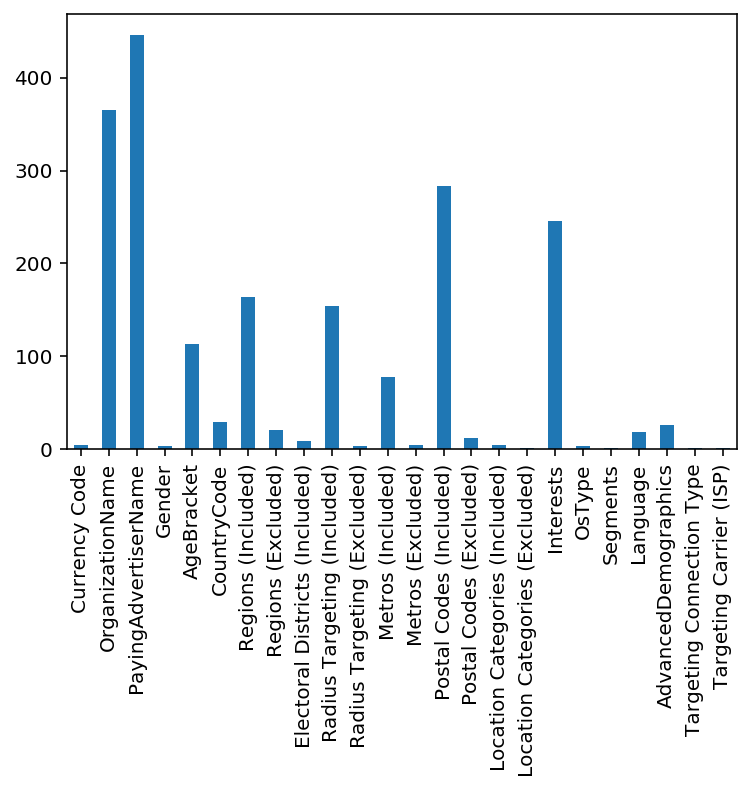

In [8]:
# in order to gain an insight in the 'uniqueness' categorical values, and gain an insight into how much information they are proving 
# about ad, let us graph a barplot with the nunique values per column!

ads.select_dtypes(include='object').nunique().plot(kind='bar')

# there is STILL lots of columns with unique values up to ~450, but since this is a baseline model, this very basic model
# will choose to hot encode all of them. Later in final model, these features might be unified or dropped depending on relevancy...

In [203]:
# we still have a LOT of categorical columns that may not have any effect on Impressions, such as Currency Code, OrganizationName, Paying
# Advertiser, looking through the columns we will be deciding to select...

catcols = ['Regions (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)',  
            'Postal Codes (Excluded)', 'Location Categories (Excluded)', 'AgeBracket', 
         'Gender', 'AdvancedDemographics', 'Language']

# Logic behind selection, depending on exlcuded regions (if any) an ad can gain less views, AgeBraket will definetely
# be a factor since the higher the age the less they may be technologically enclined etc. Views can also vary from Demograhic targeted
# (especially at a time of election), language, and Gender...
# Note: ALL these columns are nominal, therefore they will be passed through an OHE in our baseline model

In [204]:
# Now ... lets look at columns with quantitative variables in our data set

ads.select_dtypes(exclude='object').columns

# Observation: StartDate and EndDate will most likely not be handled well by sklearn, therefore we will drop these from our
# quantitative data types

Index(['Year', 'Spend', 'Impressions', 'StartDate', 'EndDate',
       'Electoral Districts (Excluded)'],
      dtype='object')

In [205]:
# for now, lets revise the NaN values in these columns in order to see how our 0 imputation might affect it!

ads.select_dtypes(exclude='object').isnull().mean()

# NOTE: Column 'Electoral Districts (Excluded)' is COMPLETELY blank, therefore, we cannot be sure if this is truly a categorical column...

Year                              0.000000
Spend                             0.000000
Impressions                       0.000000
StartDate                         0.000000
EndDate                           0.182052
Electoral Districts (Excluded)    1.000000
dtype: float64

In [206]:
# in order to see whether 'Electoral Districts (Excluded)' should be quantitative, let us explore the values in column
# 'Electoral Districts (Included)'

ads['Electoral Districts (Included)'].unique()

array([nan, 'California 25th District', 'Florida 16th District',
       'Texas 7th District', 'Texas 23rd District',
       'California 50th District', 'California 39th District',
       'California 45th District',
       'Florida 27th District,Florida 26th District',
       'Colorado 1st District,Colorado 2nd District,Colorado 6th District'],
      dtype=object)

In [207]:
# it appears that 'Electoral Districts (Excluded)' should rlly be categorical! 
# we need to add it to catcols
catcols.append('Electoral Districts (Excluded)')

In [210]:
# it is also important to note that the column 'Year' ONLY has two values. Even thought Year is represented as an int, it does NOT 
# have a quantitative 'meaning' behind it, rather it is an oridinal data type! As seen in EDA (proj03), the number of views depending on
# year HIGHLY differs: as we enter 2019, the number of Impressions tends to increase most likely due to the election yr approaching
# (at least in the states, which is where most of the data is coming from!)

# We will create a list of ordinal features, only 'Year' will be included!

ordinal = ['Year'] 

In [211]:
# Now, for our quantitative columns for our baseline model we ONLY have...
# (excluding Impressions of course since this is our target)

numcols = ['Spend']
numcols

['Spend']

In [212]:
#### BASELINE MODEL ############

# Transformer #1: Impute catcols with NULL (necessary to prevent ohe error, one hot encodes catcols
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
])

# Transformer #2: Setting up an ordinal encoder for Year feature!
ords = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value=0)),
    ('ordinal enc', OrdinalEncoder())
    
])

##### Setting up column transformer: Compute catcols transformations and Impute missing vales in numcols with 0.
ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('ordinalcols', ords, ordinal),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

###### Uniting all steps into single Pipeline
pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [214]:
#### GETTING BASELINE SCORES

# Separating test and train data with train_test_split with ads!
# It is important to note that Pipeline will ONLY use given features despite ads shape
# y is the amount of views an ad has, so ads.Impressions

X_tr, X_ts, y_tr, y_ts = train_test_split(ads.drop('Impressions', axis=1), ads.Impressions, test_size=0.25)

pl.fit(X_tr, y_tr) # fitting to X_train and y_train
pl.score(X_ts, y_ts) # getting R^2

0.24336801728023383

In [215]:
# Getting RMSE
preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2)

# Observation: Really high 

98253.90937469377

In [80]:
# Creating loop to see how the scores change across only 40 model builds!
r2 = []
rmse = []

for _ in range(40):
    X_tr, X_ts, y_tr, y_ts = train_test_split(ads.drop('Impressions', axis=1), ads.Impressions, test_size=0.25)
    pl.fit(X_tr, y_tr) # fitting to X_train and y_train
    r2.append(pl.score(X_ts, y_ts))
    preds = pl.predict(X_ts)
    rmse.append(np.sqrt(np.mean(preds - y_ts)**2))

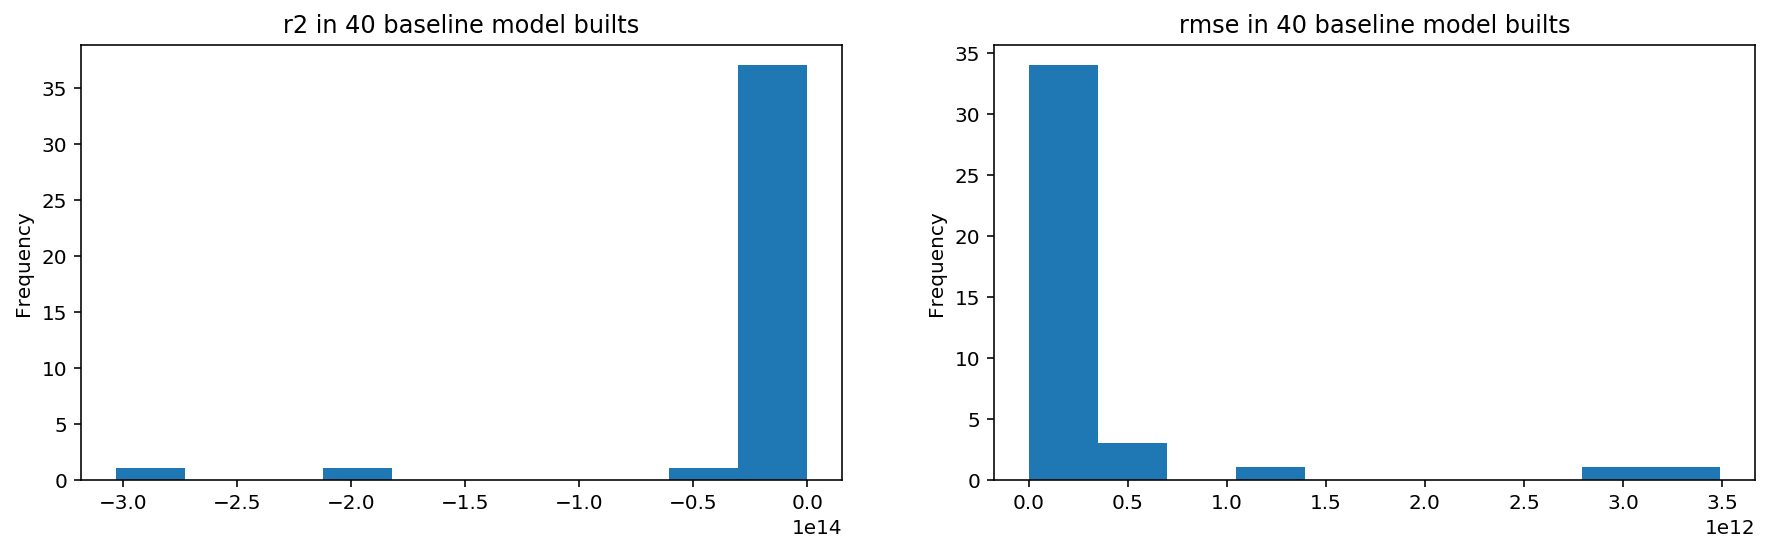

In [81]:
# Plotting all R2 values and RMSE values!

fig, axes = plt.subplots(1, 2)

pd.Series(r2).plot(kind='hist', title='r2 in 40 baseline model builts', ax=axes[0]); #r2 plot
pd.Series(rmse).plot(kind='hist', title='rmse in 40 baseline model builts', ax=axes[1]); # rmse plot

fig.set_figwidth(15)

In [82]:
# Baseline model is EXTREMELY unstable and does not pick up on the different patterns that lead to a successful model of predicting
# Impressions in an ad. Looking at the right plot of the R^2 values for each model built, we can see that all R^2 values found were 
# negative, these negative R^2 also are EXTREMLY high in magnitude as seen by the scaling of the plot! (1e13). Looking at RMSE (alse
# to illustrate quality of the model), we can see that there are instances were we get EXTREMELY high values of RMSE (plot is scaled
# to 1e12, meaning that there are instances where we have RMSE values at 1.2*10^12! Our engineered features in our baseline model
# do NOT reflect the pattern, even though the selected features (columns in ads) may reflect a relationship between Impressions and 
# characteristics of an ad, the way these are engineered do NOT reflect the pattern we are trying to pick up.

### Final Model

In [83]:
# In order to improve out model, we need to decide which features are able to describe our target the best. That is, what is able to
# explain the change in Impressions by a given ad? In order to do this, we must investigate different patterns we see as the number
# of Impressions fluctuates.

In [9]:
# 1. First engineered feature we will create will be to extract information from StartDate and EndDate, more specifically 
# the duration of an ad!

# NOTE: These are added features that were NOT included in baseline model due to sklearn not being able to handle them.
# In our final model, we will engineer such features such that we extract the important information from them.

# first, we will create a helper function that will extract the duration of an ad: how many total days was the ad put up?

def get_duration(row):
    # row will contain StartDate and EndDate
    df = pd.DataFrame(columns=['Duration'])
    df.Duration = (row.EndDate - row.StartDate).dt.days # NOTE: this is duration in DAYS
    return df

In [10]:
# how will our transformation look like? 

func = FunctionTransformer(get_duration)
func.transform(ads[['StartDate', 'EndDate']].head()) # this will be the designed feature!

# NOTICE: we still have to add a SimpleImputer since EndDate has missing values that will not allow us to calculate Duration.
# In project03, it was found that EndDate was an NMAR column therefore, if EndDate is not present, we cannot determine a straightforward
# imputation for Duration, due to this we will replace Duration's missingness with a default fill_value = 0.

Duration
0      11.0
1      47.0
2       1.0
3       NaN
4      20.0

In [11]:
# (creating pipeline transformer)

dates = ['StartDate', 'EndDate'] # columns that will be used!

# Transformer Pipeline #1
duration = Pipeline([
    ('durations', FunctionTransformer(get_duration)),
    ('imp', SimpleImputer(strategy='constant', fill_value=0)) # we are imputing with 0!
])

In [12]:
# 2. We want to extract the day of the week and month the ad started! From project03, it was found that the number of Impressions has 
# the trend that # of views tends to increase if the ad was posted at the beginning of the week, and Impressions in ads that were
# posted in months such as December (towards the end of the year).

def get_dates(row):
    df = pd.DataFrame(columns=['DayStart', 'MonthStart'])
    df.DayStart = row.StartDate.dt.day_name() # getting weekday NAME
    df.MonthStart = row.StartDate.dt.month_name() # getting month NAME
    return df

In [13]:
# (example of transformation #2)

func = FunctionTransformer(get_dates)
func.transform(ads[['StartDate']].head()) # NOTICE: we converted these to STRINGS, we want to OHE as well
# it would not make sense to put them as a numerical value since the numerical value will not be able to tell us much about the ad.

DayStart MonthStart
0     Friday    October
1    Tuesday   November
2    Tuesday  September
3     Monday    October
4  Wednesday    October

In [14]:
# Transfomer Pipeline #2

startdate = ['StartDate']

starts = Pipeline([
    ('startdays', FunctionTransformer(get_dates)),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),  
    ('pca', PCA(svd_solver='full', n_components=0.99)) # adding PCA to avoid multinearity!
])

In [15]:
# 3. In baseline model, it was clear that one-hot encoding all regions included DID NOT give much information about the Impressions
# therefore, instead of using an OHE transformer to interpret the meaning of these nominal features, we will group the regions that
# were excluded from the ad. This is further more following our claim that: The more excluded regions, the lesser the views an add has!

# Columns that we will transform are: ['Regions (Excluded)', 
#       'Electoral Districts (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)',  
#            'Postal Codes (Excluded)', 'Location Categories (Excluded)']

# Lets create a helper function:

def region_target(row):
    # transforming row into 1 if non null and 0 if null
    row = row.isnull().replace({False: 1, True:0})
    s = row.sum(axis=1) # SUMMING across row the number of geographical categories that were excluded from an ad!
    return pd.DataFrame(s)

In [16]:
# (example of (engineered) feature 3)

func = FunctionTransformer(region_target)
func.transform(ads[['Regions (Excluded)', 
       'Electoral Districts (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)',  
            'Postal Codes (Excluded)', 'Location Categories (Excluded)']].head())

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

In [17]:
# Transformer Pipeline #3

regions = ['Regions (Excluded)', 
       'Electoral Districts (Excluded)', 'Radius Targeting (Excluded)', 'Metros (Excluded)',  
            'Postal Codes (Excluded)', 'Location Categories (Excluded)']

regional = Pipeline([
    ('region excluded', FunctionTransformer(region_target)),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)) # in case of ANY missing values (to avoid any general errors)
])

In [18]:
# 4. We still want to OHE columns: ['AgeBracket', 'Gender', 'AdvancedDemographics', 'Year', 'Language'], but now we will be adding a 
# PCA in order to prevent multilinearity.

ohe_cols =  ['AgeBracket', 'Gender', 'AdvancedDemographics', 'Language']

# Transfomer Pipeline #4
ohe = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')), # (imputer to prevent errors)
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

In [19]:
# 5. We are STILL going to include Year's Ordinal Encoder Transformer (this is included again for illustration purposes)

ordinal = ['Year']

# Transformer Pipeline #5: Setting up an ordinal encoder for Year feature!
ords = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value=0)), # (filling in with 0 in case of null values to avoid general errors)
    ('ordinal enc', OrdinalEncoder())
])

In [20]:
# 6. Passing through Spend as it is: General Claim: as Spending increases, reachibility for the ad ALSO increases and therefore, 
# Impressions increase! 

passing_cols = ['Spend']

# Transformer Pipeline #6 (Doesnt do much other than imputing values with MEAN, and passing it through)
passing = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # (imputer using MEAN!)
    ('func', FunctionTransformer(lambda x:x))
])

In [21]:
###### FINAL COLUMN TRANSFORMER ###########

# (putting together the 6 pipeline transformers)
ct = ColumnTransformer([
    ('duration', duration, dates),
    ('start day/month', starts, startdate),
    ('region excluded', regional, regions),
    ('ohe', ohe, ohe_cols),
    ('ordinal', ords, ordinal),
    ('passing', passing, passing_cols)
])


####### FINAL PIPELINE ##########
pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [217]:
# now, lets see how it performs compared to baseline

X_tr, X_ts, y_tr, y_ts = train_test_split(ads.drop('Impressions', axis=1), ads.Impressions, test_size=0.25)

pl.fit(X_tr, y_tr) # fitting to X_train and y_train
pl.score(X_ts, y_ts) # higher than baseline model!

0.7657808800881536

In [218]:
# Getting RMSE for final model!

preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2) # way lower RMSE than baseline model

10851.271247613466

In [234]:
# running 40 model builds all with diffrent X_tr/ts and y_tr/ts models to see overall performance

r2 = []
rmse = []
for _ in range(40):
    X_tr, X_ts, y_tr, y_ts = train_test_split(ads.drop('Impressions', axis=1), ads.Impressions, test_size=0.25)
    pl.fit(X_tr, y_tr) # fitting to X_train and y_train
    r2.append(pl.score(X_ts, y_ts)) # r2
    preds = pl.predict(X_ts) # getting predictions
    rmse.append(np.sqrt(np.mean(preds - y_ts)**2)) # rmse

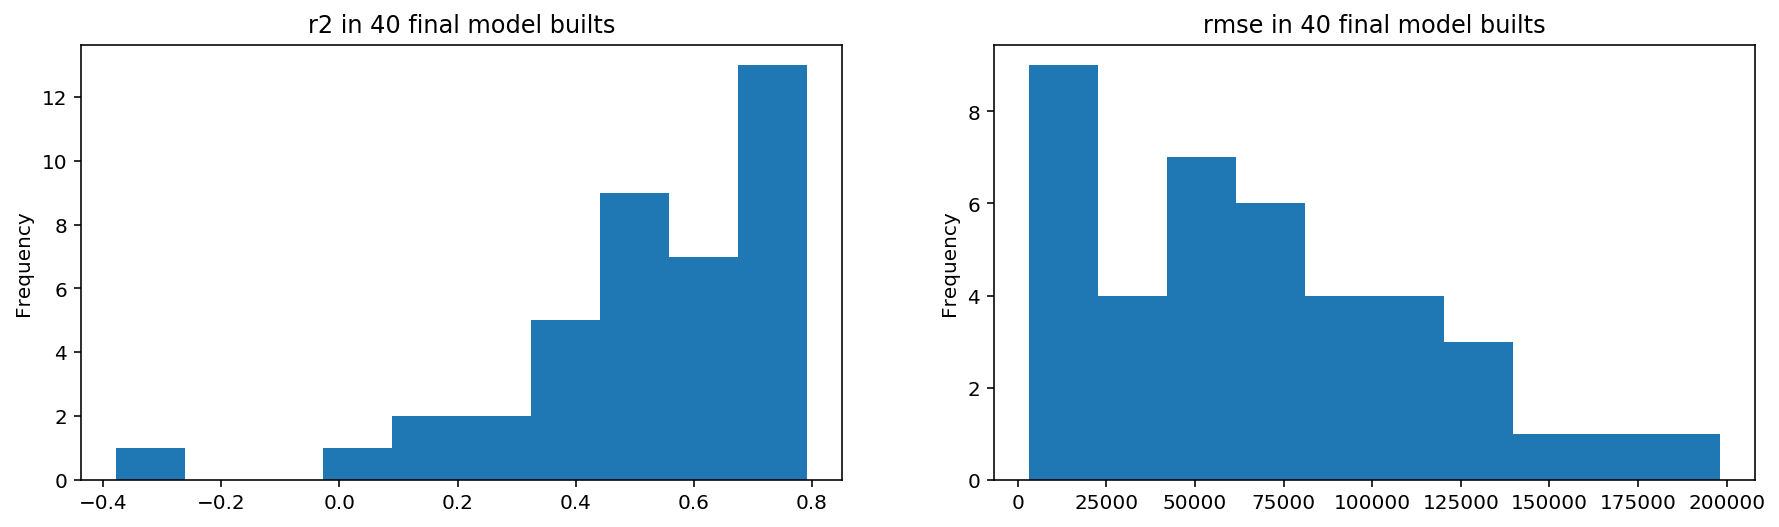

In [235]:
# Plotting all R2 values and RMSE values!

fig, axes = plt.subplots(1, 2)

pd.Series(r2).plot(kind='hist', title='r2 in 40 final model builts', ax=axes[0]); #r2 plot
pd.Series(rmse).plot(kind='hist', title='rmse in 40 final model builts', ax=axes[1]); # rmse plot

fig.set_figwidth(15)

In [24]:
# Now, to test for best model ... lets try to compare our values to a DecisionTreeRegressor using the same engineered features from
# our final model and see the range of R^2 across all values

# lets define pl2, which will contain the column transformer from our final pl, but now it will contain a DecisionTreeRegressor

pl2 = Pipeline([('feats', ct), ('reg', DecisionTreeRegressor())])

In [37]:
# running 40 model DecisionTreeRegressor models, all with diffrent X_tr/ts and y_tr/ts models to see overall performance:

r2 = []
rmse = []
for _ in range(40):
    X_tr, X_ts, y_tr, y_ts = train_test_split(ads.drop('Impressions', axis=1), ads.Impressions, test_size=0.25)
    pl2.fit(X_tr, y_tr) # fitting to X_train and y_train
    r2.append(pl2.score(X_ts, y_ts)) # r2
    preds = pl2.predict(X_ts) # getting predictions
    rmse.append(np.sqrt(np.mean(preds - y_ts)**2)) # rmse

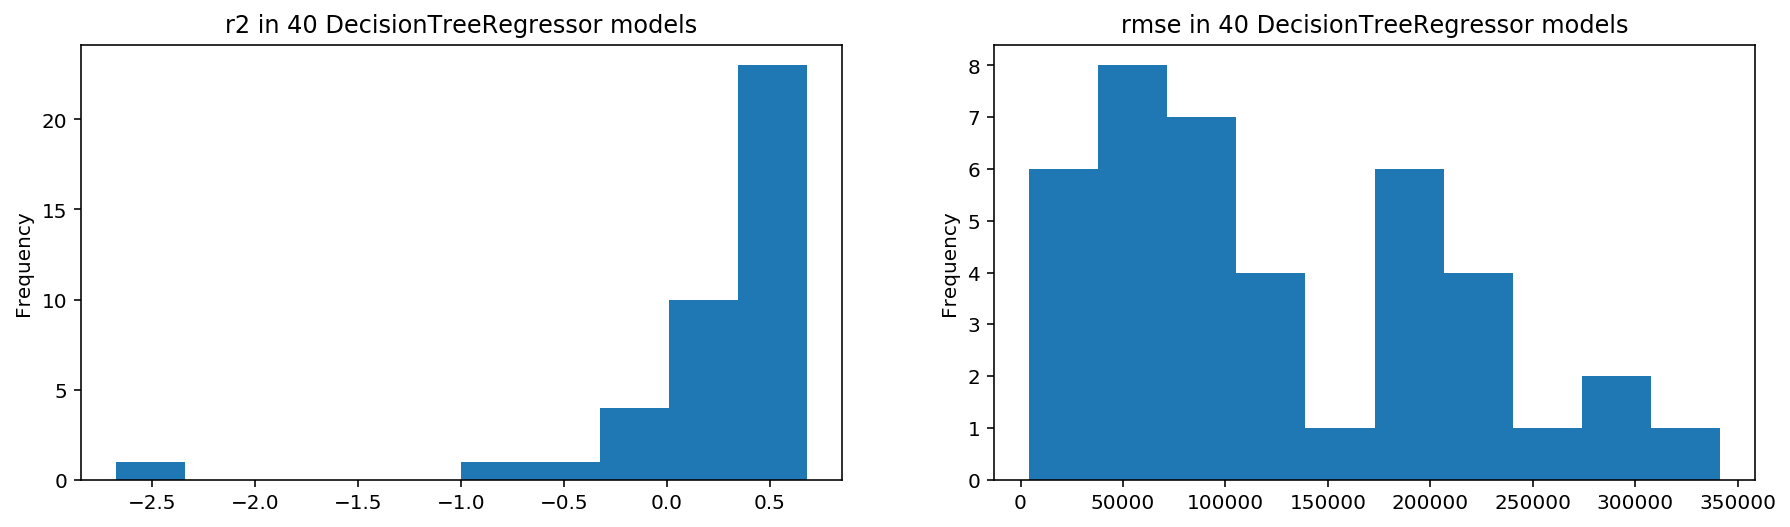

In [38]:
# plotting results from above!

fig, axes = plt.subplots(1, 2)

pd.Series(r2).plot(kind='hist', title='r2 in 40 DecisionTreeRegressor models', ax=axes[0]); #r2 plot
pd.Series(rmse).plot(kind='hist', title='rmse in 40 DecisionTreeRegressor models', ax=axes[1]); # rmse plot

fig.set_figwidth(15)

In [39]:
# The DecisionTreeRegressor model using our new engineered features from the baseline model also seems to perform decently well.
# It is expected that this model will perform better than our original baseline model due to the new added features, however comparing
# the performance of the final model using LinearRegression and the model using a DecisionTreeRegressor we see that using
# a DecisionTreeRegressor definetely makes our final model more unstable as reflected by the ~-2.5 cluster of R^2 and an 
# increase in frequency across a wider range of negative R^2 values. On the other side, using LinearRegression these 40 models consistenly 
# fall into ranges of R^2 values that we want, ranging across ~0.0 and ~0.7 most of the time! As to RMSE, using a DecisionTreeRegressor 
# outputs a wider range of RMSE values in the 40 models: most of LinearRegression models fall across < ~25,000 RMSE while 
# the DecisionTreeRegressor outputs models falling around ~50,000 and ~10,000 RMSE! Therefore, we conclude that LinearRegression 
# is still the best fit for our final model.

In [100]:
# Now.. Adressing performance Final Model vs Baseline (LR chosen as best model as explained above)...

# Conclusion: Final model has increased the accuracy values across all R^2 values in across all of our 40 model builds! most R^2
# values range across ~0.0 and ~0.7. Even though final model still presents some negative values, it is definetely not as extreme
# as getting negative R^2 values in a range between -0.0 and -1e13. This reflects that final model could be improved further more, 
# but the added engineerd features are in the final model were able to successfully find patterns to predict Impressions! Looking at
# the RMSE for each of the 40 splits, these values seemed to lower extremly. Instead of getting really high in magnitude RMSE values 
# 1e14 scale, final model reduced all these RMSE values significantly.

### Fairness Evaluation

In [195]:
# To test for fairness, we are choosing to test our model performance based on CountryCode. The question that will be answered is: 
# Does our model have better predictions for Impressions for ads to be distributed in the US than for other countries? 
# This test is a permutation test with the Null Hypothesis: my model is fair, performance (rmse) is the same across both groups vs 
# the Alternative Hypothesis: model is unfair; performance of model(rmse) is higher for US ads. For this test, we will use 
# the observed statistic of difference between both groups' rmse (more specifically other_rmse - us_rmse), and will be testing 
# against an alpha of 0.01.

# NOTE:
# For the purpose of this test, all ads that were not distributed to the US are going to be counted as 'other'. Therefore,
# we define for our fairness test the A(attribute of interest group) to be ads distributed OUTSIDE the US.

# -------------------------------------------------------------------------------------------------------------------------------------

# 1. lets find rmse for each subgroup using our model. (step to calculate observed stat)

# We will fit final model pipeline with the entirety of ads (this is our training data)
pl.fit(ads.drop('Impressions', axis=1), ads.Impressions)

# Now, we can score these using different subsets.
us = ads[ads.CountryCode == 'united states'].copy()

# getting predictions and calculating US rmse
preds = pl.predict(us.drop('Impressions', axis=1))
us_rmse = np.sqrt(np.mean(preds - us.Impressions)**2)
us_rmse

84754.55896267663

In [139]:
# now, we want to calculate rmse for all ads targeted to other countries (not to the us)

other = ads[ads.CountryCode != 'united states'].copy()

# getting predictions and calculating us rmse
preds = pl.predict(other.drop('Impressions', axis=1))
other_rmse = np.sqrt(np.mean(preds - other.Impressions)**2)
other_rmse # a higher rmse for ads that targeted other countries, is this significant?

95903.89516804836

In [140]:
# 2. Defining observed statistic, calculating observed difference (other - US)

# For our observed stats we are going to compute the different between 'others's rmse and ads targeting the states rmse
obs = other_rmse - us_rmse
obs # is this value significant?

12831.916012865404

In [141]:
####### PERMUTATION TEST ########

# NOTE: We are using df 'countries', which is just a copy of ads for shuffling CountryCodes. 
# This is to not edit original data, ads.

countries = ads.copy()

N = 300
differences = [] # differences will hold our test stat

for _ in range(N):       
    # 1. Shuffling countries for each iteration
    shuffled_countries = (
        countries['CountryCode']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )

    # 2. Setting shuffled_countries to countries (ads copy) CountryCode!
    countries.CountryCode = shuffled_countries

    # 3. Getting us_scores and other_scores
    us = countries[countries.CountryCode == 'united states'].copy()
    preds = pl.predict(us.drop('Impressions', axis=1))
    us_rmse = np.sqrt(np.mean(preds - us.Impressions)**2) # getting us_score

    other = countries[countries.CountryCode != 'united states'].copy()
    preds = pl.predict(other.drop('Impressions', axis=1))
    other_rmse = np.sqrt(np.mean(preds - other.Impressions)**2) # getting other_score

    # 4. Appending observed statistic, difference betweeen us and other's rmse!
    differences.append(other_rmse - us_rmse)

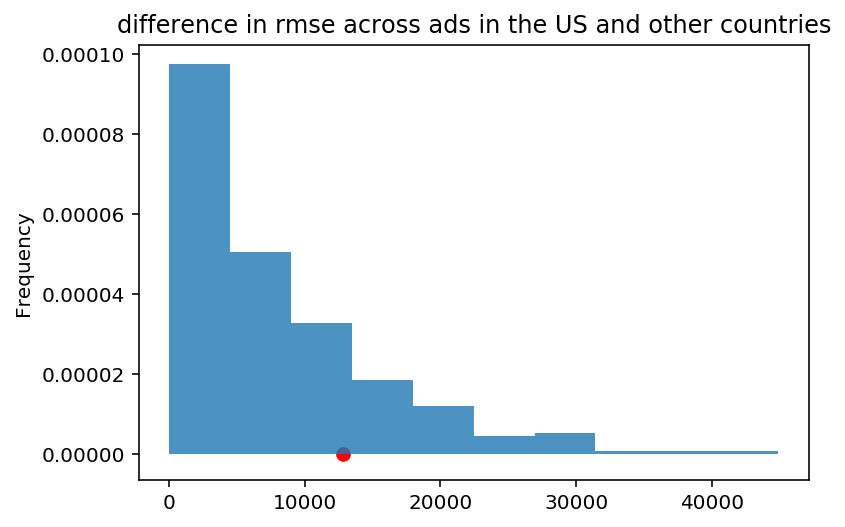

In [142]:
# 5. Now, lets graph our observed difference between ads distributed in the US and ads distributes in other countries

pd.Series(differences).plot(kind='hist', density=True, alpha=0.8, title='difference in rmse across ads in the US and other countries')
plt.scatter(obs, 0, color='red', s=40);

In [143]:
# 6. Getting p-value for obs

(pd.Series(differences) >= obs).mean()

0.21666666666666667

In [108]:
# Conclusion: Since p-value(0.216) > alpha(0.01), we do not reject the Null! Therefore, we can conclude that our model
# is fair across subgroup of interest, A, as well as ads outside this group. In other words, our model seems to be 
# generating predictions for ads distributed outside the US and ads distributed in the US fairly, the difference that we see in
# RMSE across both groups is NOT significant.